In [1]:
import pandas as pd
import pickle
#import graph_tool.all as gt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

import networkx as nx
import random
import copy
import math

from information_functions import *

%matplotlib inline

# Uploading our dataset

In [2]:
file_path = './data/nosology_updated.csv'

dataSkelDys=pd.read_csv(file_path)

In [3]:
dataSkelDys

,Unnamed: 0,X,Group,inheri,Gene,Omim,Orph,GroupN
0,1.0,1.0,1. FGFR3 chondrodysplasia group,NaN,NaN,NaN,NaN,NaN
1,2.0,2.0,Thanatophoric dysplasia type 1,AD,FGFR3,187600.0,18060.0,1.0
2,3.0,3.0,Thanatophoric dysplasia type 2,AD,FGFR3,187601.0,93274.0,1.0
3,4.0,4.0,Severe achondroplasia with developmental delay...,AD,FGFR3,616482.0,85165.0,1.0
4,5.0,5.0,Achondroplasia,AD,FGFR3,100800.0,15.0,1.0
...,...,...,...,...,...,...,...,...
768,768.0,768.0,NaN,AD,GDF6,617898.0,NaN,42.0
769,769.0,769.0,Radio-ulnar synostosis with amegakaryocytic th...,AD,HOXA11,605432.0,71289.0,42.0
770,770.0,770.0,NaN,AD,MECOM,616738.0,NaN,42.0
771,771.0,771.0,Liebenberg syndrome,AD,PITX1,186550.0,1275.0,42.0


# Extracting Human Annotated Groups

The next cell is done using the data from the dictionary of skeletal dysplasias

In [10]:
SkelDysp_HumanAnottatedGroups = {}

for i, row in dataSkelDys.iterrows():
    
    g = row['GroupN']
    f = row['Omim']
    
    g = str(g)
    g = g.rsplit('.')[0]
    f = str(f)
    
    if g != 'nan':
        
        if g not in SkelDysp_HumanAnottatedGroups.keys():        
            SkelDysp_HumanAnottatedGroups[g]=[]
            
        if f not in SkelDysp_HumanAnottatedGroups[g]:
            f = f.rsplit('.')[0]
            f = 'OMIM:'+ f

            SkelDysp_HumanAnottatedGroups[g].append(f)

    

# Comparing blocks and dictionaries containing skeletal dysplasias

## 1. Importing block data from pickle objects

In [11]:
pickle_in = open("./data/Dict_Data_.pickle", "rb")
Dictionary_Data = pickle.load(pickle_in) #### Block Data

In [12]:
Dictionary_Data.keys()

dict_keys(['dict_EdgeCounts', 'RAW_EdgeCounts', 'block_TotalDegree', 'sorted_TotalDegree', 'block_AverageDegree', 'sorted_AverageDegree', 'sorted_EdgeCounts', 'blockDictionary_GD', 'blockDictionary_Ph', 'heatMAP', 'blockDictionary'])

In [13]:
dict_EdgeCounts = Dictionary_Data['dict_EdgeCounts']
RAW_EdgeCounts = Dictionary_Data['RAW_EdgeCounts']
block_TotalDegree = Dictionary_Data['block_TotalDegree']
sorted_TotalDegree = Dictionary_Data['sorted_TotalDegree']
block_AverageDegree = Dictionary_Data['block_AverageDegree']
sorted_AverageDegree = Dictionary_Data['sorted_AverageDegree']
sorted_EdgeCounts = Dictionary_Data['sorted_EdgeCounts']
blockDictionary_GD = Dictionary_Data['blockDictionary_GD']
blockDictionary_Ph = Dictionary_Data['blockDictionary_Ph']
heatMAP = Dictionary_Data['heatMAP']
blockDictionary = Dictionary_Data['blockDictionary']

In [15]:
pickle_in = open("./data/G_connected_NX_.pickle", "rb")
G_connected = pickle.load(pickle_in)

## 2. Inspecting blocks using the imported function

Please, use the next function to analyse the different blocks of Genes/Diseases and Phenotypic abnormalities. 

Guide: 
Please, modify the variables number_of_block_GD and number_of_block_Ph to explore them.

2157
The number of edges between these blocks is:  2157
The normalised edge counts between these blocks is:  0.02867512163994576
The number of nodes in the subgraph is: 465
The size of the largest component in the subgraph of these two blocks is: 8

['TRAF7', 'PTGIS', 'KCNQ2', 'ALDH6A1', 'NFKB2', 'PADI6', 'TULP1', 'PLCE1', 'TPK1', 'C1R', 'ING1', 'ESR1', 'ACD', 'TAL1', 'NCF4', 'FGF14', 'KDR', 'CYBB', 'MBTPS2', 'FOXC2', 'IGSF1', 'RNF125', 'PTCH2', 'AKT1', 'HOGA1', 'LINGO1', 'CHIC2', 'DGAT1', 'SON', 'PEX3', 'SNRPN', 'LRIG2', 'CENPJ', 'TNNT1', 'RETN', 'CASR', 'CDCA7', 'SLC19A3', 'KIDINS220', 'LPP', 'DEGS1', 'PATL2', 'AIMP1', 'IMPG2', 'CORIN', 'SEC63', 'KCNQ3', 'TBX19', 'COQ4', 'FAM20A', 'NAXD', 'CCL11', 'CBX2', 'TTC7A', 'MINPP1', 'RAD50', 'GJA1', 'DRD4', 'ASS1', 'SLC5A2', 'HTRA1', 'SLC35A3', 'GSDME', 'FBLN1', 'COASY', 'SLC25A1', 'FAT4']

['Cone-shaped epiphyses of the phalanges of the hand', 'Platyspondyly', 'Lumbar hyperlordosis', 'Short long bone', 'Limited elbow extension', 'Genu varum'

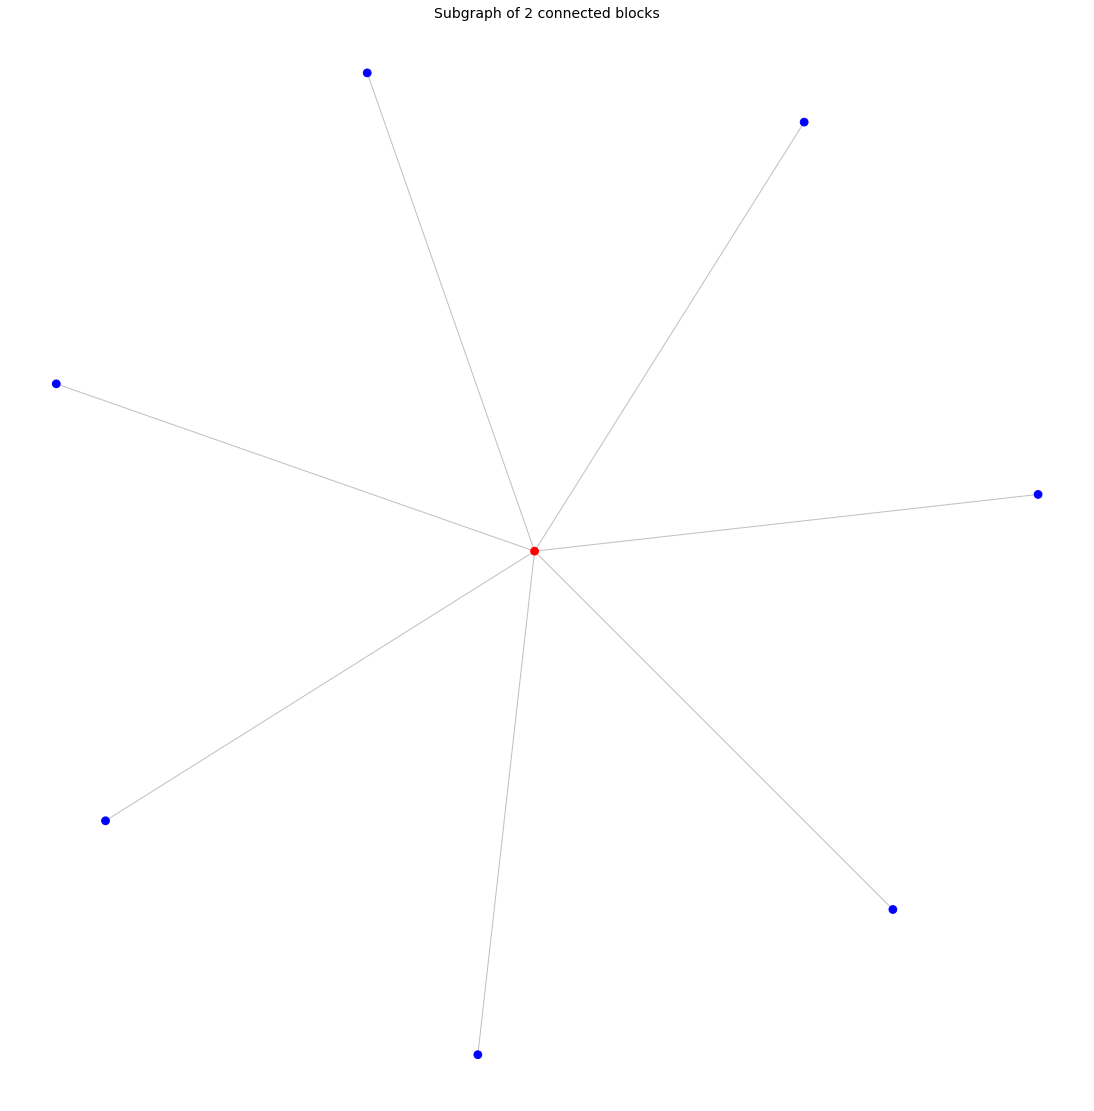

In [131]:
number_of_block_GD = 33 # Block 33 of Genes and Diseases
number_of_block_Ph = 77 # block 77 in the blocks of Phenotypes. Please, notice that these blocks starts from the number 50.

inspect_blocks(number_of_block_GD, number_of_block_Ph, \
               RAW_EdgeCounts, dict_EdgeCounts, blockDictionary, G_connected, "disease", False)

# Clustering analysis and Information Theory analysis

In [46]:
n,m = len(SkelDysp_HumanAnottatedGroups), len(blockDictionary_GD) # Defining 

In [32]:
contM=contingency_matrix(SkelDysp_HumanAnottatedGroups,blockDictionary_GD)

Calculating Normalised Mutual Information from the contingency table

In [ ]:
inspect_blocks

In [34]:
# Sanity check
Entropy, Pointwise = COMPUTE_ENTROPY(contM, C_or_R = 'Rows')
Entropy

3.521792369228441

In [35]:
inspect_blocks

<function information_functions.inspect_blocks(b1, b2, RAW, dict_EC, blockD, G_con, filter_out, Node_Labels)>

## Plot of entropy and joint entropy between Blocks and the HPO

In [38]:
# Sanity check for Joint Entropy calculation
Joint_Entropy, Pointwise_Joint = COMPUTE_JOINT_ENTROPY(contM)

In [39]:
Joint_Entropy

4.678253953732584

In [41]:
JointEntropy_pointwise = pd.DataFrame(Pointwise_Joint)

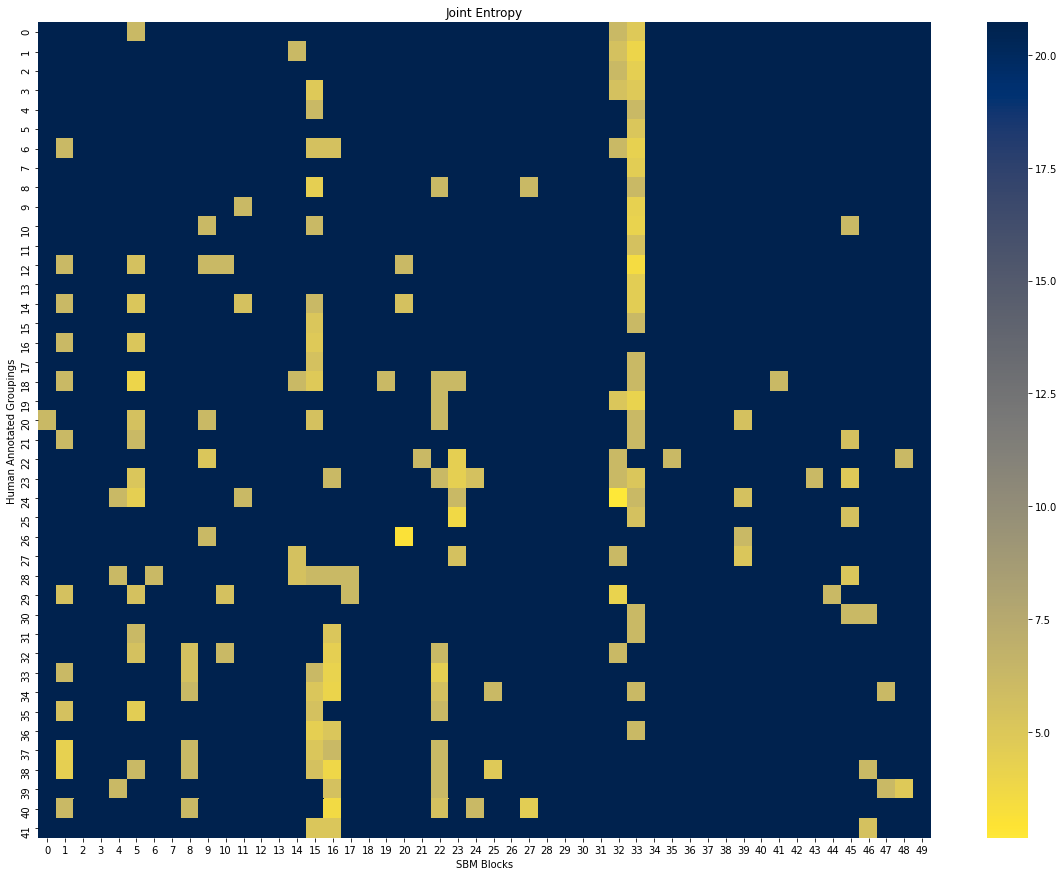

In [42]:
color_map = plt.cm.get_cmap('cividis')
colorMap_rev = color_map.reversed()
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(JointEntropy_pointwise, cmap=colorMap_rev, ax=ax)
ax.set_xlabel('SBM Blocks')
ax.set_ylabel('Human Annotated Groupings')
ax.set_title('Joint Entropy')
plt.show()

## Plot of mutual information between Blocks and the HPO

In [73]:
MI_actual, PMI_matrix = COMPUTE_MUTUAL_INFORMATION(contM)

In [74]:
MI_actual

1.4974137177928497

In [51]:
Pointwise_MI = pd.DataFrame(PMI_matrix)

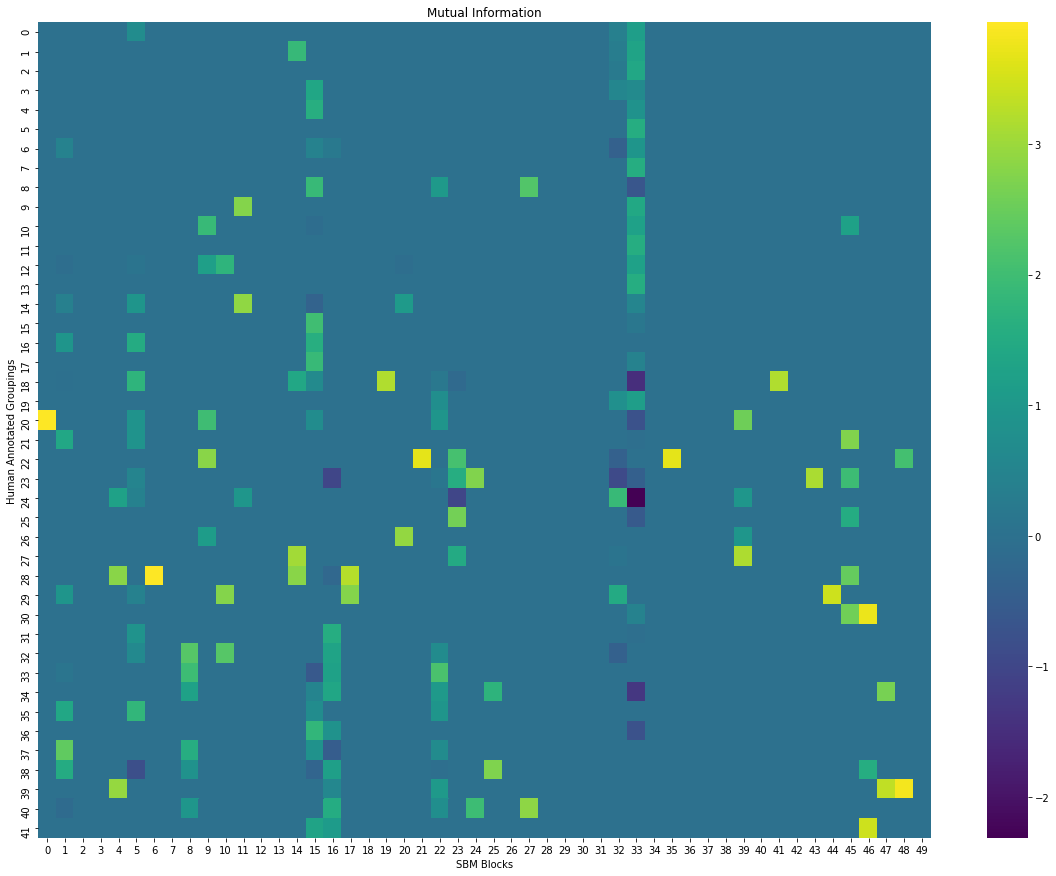

In [52]:

fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(Pointwise_MI, cmap='viridis', ax=ax)
ax.set_xlabel('SBM Blocks')
ax.set_ylabel('Human Annotated Groupings')
ax.set_title('Mutual Information')
plt.show()

# Testing statistical significance by introducing a shuffling operation

## Testing with large numbers of swapps

In [92]:
dict_GD = copy.deepcopy(blockDictionary_GD)

In [93]:
dicts_after_shufflings_large = []
number_of_swaps_large = [1,5,10,50,100,500,1000,2000,5000,10000,30000,50000,100000,200000,300000,400000,500000,\
                   600000,700000,800000,900000]

for swap in number_of_swaps_large:
    dict_GD = copy.deepcopy(blockDictionary_GD)
    
    for i in range(swap):
    
        flag = True   

        while flag:
            rndm_block_1 = np.random.randint(len(dict_GD))
            rndm_block_2 = np.random.randint(len(dict_GD))

            if rndm_block_1 == rndm_block_2:
                continue
            else:
                flag = False

        temp_random_node_1 = random.sample(dict_GD[rndm_block_1],1)
        temp_random_node_2 = random.sample(dict_GD[rndm_block_2],1)


        temp_random_node_1 = temp_random_node_1[0]
        temp_random_node_2 = temp_random_node_2[0]
        # Performing the swap: It will have two parts

        # 1. appending the node to the another block
        dict_GD[rndm_block_1].append(temp_random_node_2)
        dict_GD[rndm_block_2].append(temp_random_node_1)

        # 2. removing the other node
        dict_GD[rndm_block_1].remove(temp_random_node_1)
        dict_GD[rndm_block_2].remove(temp_random_node_2)

    del temp_random_node_1, temp_random_node_2
        
    dicts_after_shufflings_large.append(dict_GD)

contingency_matrix_shuff = contingency_matrix(SkelDysp_HumanAnottatedGroups,dicts_after_shufflings_large[10])

In [99]:
MI_list_large = []

for dict_i in dicts_after_shufflings_large:
    
    contingency_matrix_shuff = contingency_matrix(SkelDysp_HumanAnottatedGroups,dict_i)
    MI = COMPUTE_MUTUAL_INFORMATION(contingency_matrix_shuff)[0]
    
    MI_list_large.append(MI)
    
    del MI
    

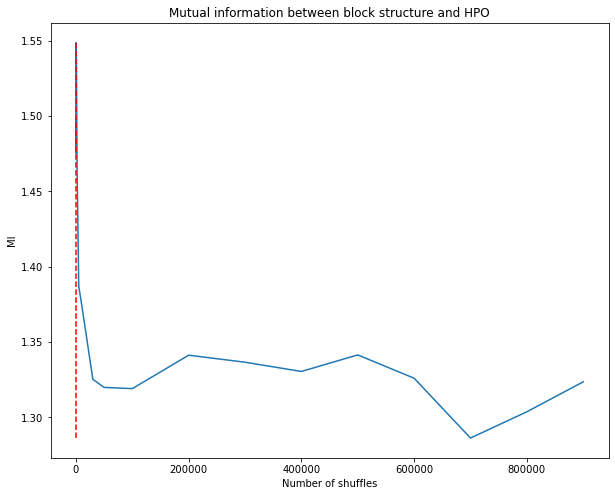

In [115]:
plt.figure(figsize=(10,8))

plt.plot(number_of_swaps_large,MI_list_large)
plt.plot([number_of_swaps_large[np.argmax(MI_list)],number_of_swaps_large[np.argmax(MI_list)]],\
         [np.min(MI_list),np.max(MI_list)],"--r")

plt.xlabel("Number of shuffles")
plt.ylabel("MI")
plt.title("Mutual information between block structure and HPO")
 
plt.show()

It is important to notice that the number largest value for Mutual Information is found at the very beginning of the sampling process. This is a hint of the existence of a genuine structure in the Blocks. This means that the way they were created is better than random.

## Testing with small numbers of swapps

In [106]:
dicts_after_shufflings_small = []

number_of_swapps_small = [1,5,10,50,100,500,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000]

for swap in number_of_swapps_small:
    dict_GD = copy.deepcopy(blockDictionary_GD)
    
    for i in range(swap):
    
        flag = True   

        while flag:
            rndm_block_1 = np.random.randint(len(dict_GD))
            rndm_block_2 = np.random.randint(len(dict_GD))

            if rndm_block_1 == rndm_block_2:
                continue
            else:
                flag = False

        temp_random_node_1 = random.sample(dict_GD[rndm_block_1],1)
        temp_random_node_2 = random.sample(dict_GD[rndm_block_2],1)


        temp_random_node_1 = temp_random_node_1[0]
        temp_random_node_2 = temp_random_node_2[0]
        # Performing the swap: It will have two parts

        # 1. appending the node to the another block
        dict_GD[rndm_block_1].append(temp_random_node_2)
        dict_GD[rndm_block_2].append(temp_random_node_1)

        # 2. removing the other node
        dict_GD[rndm_block_1].remove(temp_random_node_1)
        dict_GD[rndm_block_2].remove(temp_random_node_2)

    del temp_random_node_1, temp_random_node_2
        
    dicts_after_shufflings_small.append(dict_GD)


In [107]:
MI_list_small = []

for dict_i in dicts_after_shufflings_small:
    
    contingency_matrix_shuff = contingency_matrix(SkelDysp_HumanAnottatedGroups,dict_i)
    MI_small = COMPUTE_MUTUAL_INFORMATION(contingency_matrix_shuff)[0]
    
    MI_list_small.append(MI_small)
    
    del MI_small

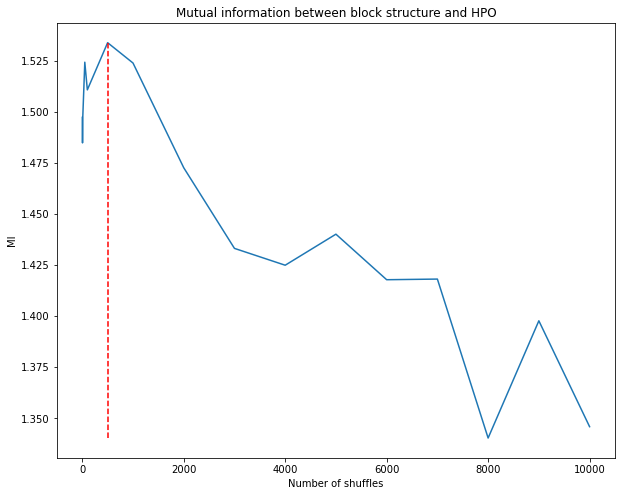

In [114]:
plt.figure(figsize=(10,8))

plt.plot(number_of_swapps_small,MI_list_small)
plt.plot([number_of_swapps_small[np.argmax(MI_list_small)],number_of_swapps_small[np.argmax(MI_list_small)]],\
         [np.min(MI_list_small),np.max(MI_list_small)],"--r",\
         label='maximum MI value for {} swapps'.format(number_of_swapps_small[np.argmax(MI_list_small)]))

plt.xlabel("Number of shuffles")
plt.ylabel("MI")
plt.title("Mutual information between block structure and HPO")
 
plt.show()

It is important to notice that the number largest value for Mutual Information is found at the very beginning of the sampling process. This is a hint of the existence of a genuine structure in the Blocks. This means that the way they were created is better than random. 

The trend is the same as in the case of large number of shufflings, but the value and the fluctuation is a bit higher. In the long run, as in the plot for large number of shufflings, this fluctuation vanishes.

# RESULTS -----------------------------------------------------------------------

In [65]:
dictionary_shuffled_blocks = []
iterations = 500

for i in range(iterations):

    number_of_swaps = [100000]

    for swap in number_of_swaps:
        dict_GD = copy.deepcopy(blockDictionary_GD)

        for i in range(swap):

            flag = True   

            while flag:
                rndm_block_1 = np.random.randint(len(dict_GD))
                rndm_block_2 = np.random.randint(len(dict_GD))

                if rndm_block_1 == rndm_block_2:
                    continue
                else:
                    flag = False

            temp_random_node_1 = random.sample(dict_GD[rndm_block_1],1)
            temp_random_node_2 = random.sample(dict_GD[rndm_block_2],1)


            temp_random_node_1 = temp_random_node_1[0]
            temp_random_node_2 = temp_random_node_2[0]
            # Performing the swap: It will have two parts

            # 1. appending the node to the another block
            dict_GD[rndm_block_1].append(temp_random_node_2)
            dict_GD[rndm_block_2].append(temp_random_node_1)

            # 2. removing the other node
            dict_GD[rndm_block_1].remove(temp_random_node_1)
            dict_GD[rndm_block_2].remove(temp_random_node_2)

        del temp_random_node_1, temp_random_node_2
        
        dictionary_shuffled_blocks.append(dict_GD)

In [66]:
MI_list_dist = []

for dict_i in dictionary_shuffled_blocks:
    
    contingency_matrix_shuff = contingency_matrix(SkelDysp_HumanAnottatedGroups,dict_i)
    MI = COMPUTE_MUTUAL_INFORMATION(contingency_matrix_shuff)[0]
    MI_list_dist.append(MI)
    
    

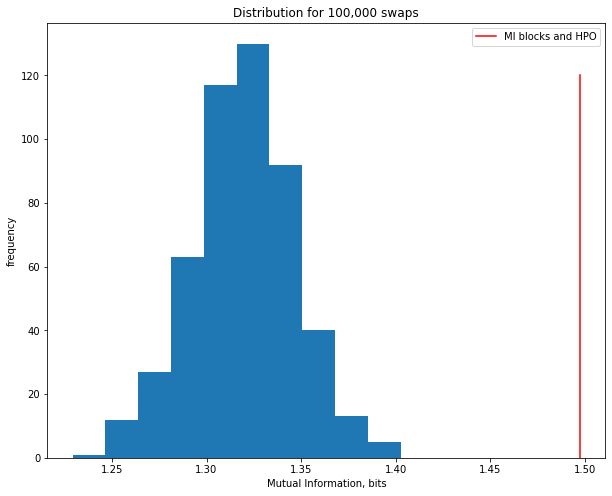

In [75]:
plt.figure(figsize=(10,8))

plt.hist(MI_list_dist)
plt.plot([MI_actual,MI_actual],\
         [0,120],"-r",\
         label='MI blocks and HPO')

plt.xlabel("Mutual Information, bits")
plt.ylabel("frequency")
plt.title("Distribution for 100,000 swaps")

plt.legend()
 
plt.show()


# Attaining P-value

In [83]:
DIST = np.array([MI_list_dist])

In [84]:
DIST = DIST.reshape(500,1)

In [85]:
import sklearn
from sklearn.neighbors import KernelDensity

kde_X = KernelDensity(kernel='gaussian', bandwidth=0.02).fit(DIST)
MI_true = np.array(1.4974)
MI_true = MI_true.reshape(1,-1)
p_val_TRUE = np.exp(kde_X.score_samples(MI_true))

In [86]:
p_val_TRUE

array([6.01027537e-07])

In [87]:
print('{:f}'.format(p_val_TRUE[0]))

0.000001


### Conclusion

The final plot and the attained P-value demonstrate that under a null distribution of 500 independendent samples the Mutual Information between the block structure and the human annotated groupings from the 2019 Skeletal Dysplasias Nosology is extremely unlikely. <br>

In addition, the P-value calculation is a confirmation of the previous conclusion, namely, it is almost impossible to find a Mutual Information value of 1.49 between the independent random samples. To compute this value, we used a kernel density estimator with band width equals to 0.02. 